<a href="https://colab.research.google.com/github/202311003/idm_assignment_2/blob/202311071/202311071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DRIVE MOUNTING FOR DATASET

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##IMPORTING LIBRARIES

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

##LOADING DATA

In [8]:

df=pd.read_csv('/content/drive/MyDrive/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv',low_memory=False)

##EDA

In [9]:
df.head()

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,...,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,...,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,...,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33


In [10]:
df.isnull()

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622128,False,True,True,True,True,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,False
2622129,False,True,True,True,True,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,False
2622130,False,True,True,True,True,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,False
2622131,False,True,True,True,True,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False


In [11]:
df.shape

(2622133, 38)

In [12]:
df.columns

Index(['index', 'Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility ID', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Source of Payment 1', 'Source of Payment 2', 'Source of Payment 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [13]:
df.describe()

,index,Operating Certificate Number,Facility ID,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges,Total Costs
count,2.622133e+06,2.617246e+06,2.617246e+06,2622133.0,2.619860e+06,2.619860e+06,2.622133e+06,2.622133e+06,2.622133e+06,2.617246e+06,1.951315e+06,4.881420e+05,2.622133e+06,2.622133e+06,2.622133e+06
mean,1.311066e+06,5.019051e+06,1.036953e+03,2010.0,1.919431e+02,1.121324e+02,4.069629e+02,1.016206e+01,1.948373e+00,1.266323e+06,1.569229e+06,2.213083e+06,3.103701e+02,2.945920e+04,1.186523e+04
std,7.569447e+05,2.249577e+06,6.448892e+02,0.0,1.565932e+02,8.761224e+01,2.404910e+02,5.923678e+00,8.986120e-01,8.226220e+06,9.379695e+06,1.225216e+07,9.769686e+02,5.640021e+04,2.727029e+04
min,0.000000e+00,1.010000e+05,1.000000e+00,2010.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00,1.000000e-02,0.000000e+00
25%,6.555330e+05,2.951001e+06,5.410000e+02,2010.0,1.060000e+02,0.000000e+00,1.980000e+02,5.000000e+00,1.000000e+00,1.666590e+05,1.644990e+05,1.662850e+05,0.000000e+00,7.900000e+03,3.290510e+03
50%,1.311066e+06,5.907002e+06,1.117000e+03,2010.0,1.570000e+02,1.240000e+02,3.610000e+02,8.000000e+00,2.000000e+00,2.053620e+05,2.012870e+05,2.029570e+05,0.000000e+00,1.567373e+04,6.175350e+03
75%,1.966599e+06,7.002002e+06,1.450000e+03,2010.0,2.180000e+02,2.110000e+02,6.400000e+02,1.500000e+01,3.000000e+00,2.335610e+05,2.305590e+05,2.335750e+05,0.000000e+00,3.172352e+04,1.222803e+04
max,2.622132e+06,7.004010e+06,9.059000e+03,2010.0,6.700000e+02,2.310000e+02,9.560000e+02,2.500000e+01,4.000000e+00,9.100000e+07,9.100000e+07,9.100000e+07,9.900000e+03,1.206004e+07,1.470885e+07


In [14]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622133 entries, 0 to 2622132
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   index                                int64  
 1   Health Service Area                  object 
 2   Hospital County                      object 
 3   Operating Certificate Number         float64
 4   Facility ID                          float64
 5   Facility Name                        object 
 6   Age Group                            object 
 7   Zip Code - 3 digits                  object 
 8   Gender                               object 
 9   Race                                 object 
 10  Ethnicity                            object 
 11  Length of Stay                       object 
 12  Type of Admission                    object 
 13  Patient Disposition                  object 
 14  Discharge Year                       int64  
 15  CCS Diagnosis Code              

In [15]:

df.isnull().sum()

index                                        0
Health Service Area                       4887
Hospital County                           4887
Operating Certificate Number              4887
Facility ID                               4887
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       3201
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                        103
Discharge Year                               0
CCS Diagnosis Code                        2273
CCS Diagnosis Description                 2273
CCS Procedure Code                        2273
CCS Procedure Description                 2273
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code 

In [16]:

target_variable = 'APR Severity of Illness Code'
severity_distribution = df[target_variable].value_counts()
print(severity_distribution)



1    974425
2    962658
3    530085
4    154724
0       241
Name: APR Severity of Illness Code, dtype: int64


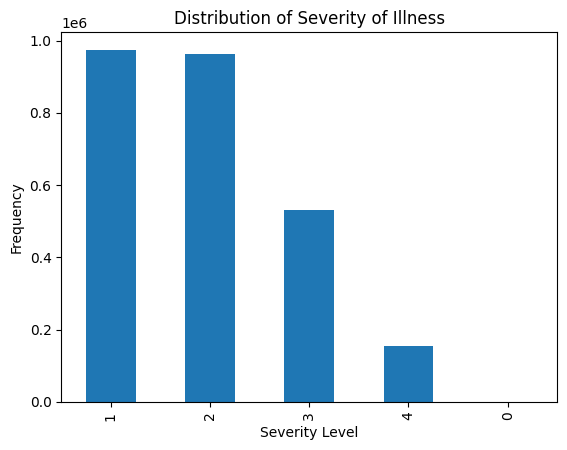

In [17]:
import matplotlib.pyplot as plt

# Plot the distribution
severity_distribution.plot(kind='bar')
plt.title('Distribution of Severity of Illness')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')
plt.show()


In [18]:
df1 = df.drop(['Facility ID', 'Facility Name','Abortion Edit Indicator','Other Provider License Number','Operating Provider License Number','index','Operating Certificate Number','Birth Weight','Race','Zip Code - 3 digits','Ethnicity','Health Service Area','Source of Payment 2', 'Source of Payment 3', 'Attending Provider License Number','CCS Procedure Description','Attending Provider License Number','APR MDC Description','APR DRG Description','Discharge Year',], axis=1)

In [19]:

df1.columns

Index(['Hospital County', 'Age Group', 'Gender', 'Length of Stay',
       'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Code',
       'CCS Diagnosis Description', 'CCS Procedure Code', 'APR DRG Code',
       'APR MDC Code', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Source of Payment 1',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [20]:
df1.head()

,Hospital County,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Emergency Department Indicator,Total Charges,Total Costs
0,Albany,18 to 29,F,1,Emergency,Home or Self Care,135.0,INTESTINAL INFECTION,0.0,249,6,1,Minor,Minor,Medical,Blue Cross,Y,4476.23,1672.65
1,Albany,50 to 69,M,15,Emergency,Home w/ Home Health Services,231.0,OTHER FRACTURE,61.0,912,25,3,Major,Extreme,Surgical,Insurance Company,Y,148612.34,51414.70
2,Albany,70 or Older,M,3,Emergency,Home w/ Home Health Services,42.0,SECONDARY MALIGNANCY,0.0,240,6,3,Major,Major,Medical,Medicare,N,16561.99,4032.49
3,Albany,70 or Older,F,5,Elective,Home w/ Home Health Services,254.0,REHAB/PROSTH FIT/ADJUST,215.0,860,23,2,Moderate,Minor,Medical,Medicare,N,13593.51,4947.81
4,Albany,70 or Older,F,4,Elective,Inpatient Rehabilitation Facility,203.0,OSTEOARTHRITIS,153.0,301,8,1,Minor,Minor,Surgical,Medicare,N,31962.58,16988.33


In [21]:
df1.isnull().sum()

Hospital County                        4887
Age Group                                 0
Gender                                    0
Length of Stay                            0
Type of Admission                         0
Patient Disposition                     103
CCS Diagnosis Code                     2273
CCS Diagnosis Description              2273
CCS Procedure Code                     2273
APR DRG Code                              0
APR MDC Code                              0
APR Severity of Illness Code              0
APR Severity of Illness Description     241
APR Risk of Mortality                   241
APR Medical Surgical Description          0
Source of Payment 1                       0
Emergency Department Indicator            0
Total Charges                             0
Total Costs                               0
dtype: int64

In [22]:
import pandas as pd

# Assuming your DataFrame is named 'df1'

# Drop rows with missing values for 'Patient Disposition'
df1 = df1.dropna(subset=['Patient Disposition'])

most_frequent_diagnosis_description = df1['CCS Diagnosis Description'].mode()[0]
df1['CCS Diagnosis Description'].fillna(most_frequent_diagnosis_description, inplace=True)

# Impute missing values in 'CCS Procedure Code' and 'CCS Procedure Description'
most_frequent_procedure_code = df1['CCS Procedure Code'].mode()[0]
df1['CCS Procedure Code'].fillna(most_frequent_procedure_code, inplace=True)

# Impute missing values in 'APR Severity of Illness Code' and 'APR Risk of Mortality'
most_frequent_severity = df1['APR Severity of Illness Code'].mode()[0]
df1['APR Severity of Illness Code'].fillna(most_frequent_severity, inplace=True)

most_frequent_risk = df1['APR Risk of Mortality'].mode()[0]
df1['APR Risk of Mortality'].fillna(most_frequent_risk, inplace=True)

# Impute missing values in 'APR Severity of Illness Description'
most_frequent_severity_description = df1['APR Severity of Illness Description'].mode()[0]
df1['APR Severity of Illness Description'].fillna(most_frequent_severity_description, inplace=True)

# Print updated DataFrame with missing values handled
print(df1.head())


  Hospital County    Age Group Gender Length of Stay Type of Admission  \
0          Albany     18 to 29      F              1         Emergency   
1          Albany     50 to 69      M             15         Emergency   
2          Albany  70 or Older      M              3         Emergency   
3          Albany  70 or Older      F              5          Elective   
4          Albany  70 or Older      F              4          Elective   

                 Patient Disposition  CCS Diagnosis Code  \
0                  Home or Self Care               135.0   
1       Home w/ Home Health Services               231.0   
2       Home w/ Home Health Services                42.0   
3       Home w/ Home Health Services               254.0   
4  Inpatient Rehabilitation Facility               203.0   

  CCS Diagnosis Description  CCS Procedure Code  APR DRG Code  APR MDC Code  \
0      INTESTINAL INFECTION                 0.0           249             6   
1            OTHER FRACTURE         

In [23]:
df1.isnull().sum()

Hospital County                        4887
Age Group                                 0
Gender                                    0
Length of Stay                            0
Type of Admission                         0
Patient Disposition                       0
CCS Diagnosis Code                     2273
CCS Diagnosis Description                 0
CCS Procedure Code                        0
APR DRG Code                              0
APR MDC Code                              0
APR Severity of Illness Code              0
APR Severity of Illness Description       0
APR Risk of Mortality                     0
APR Medical Surgical Description          0
Source of Payment 1                       0
Emergency Department Indicator            0
Total Charges                             0
Total Costs                               0
dtype: int64

In [24]:
df2= df1.copy()

In [25]:
df2.shape

(2622030, 19)

<Axes: >

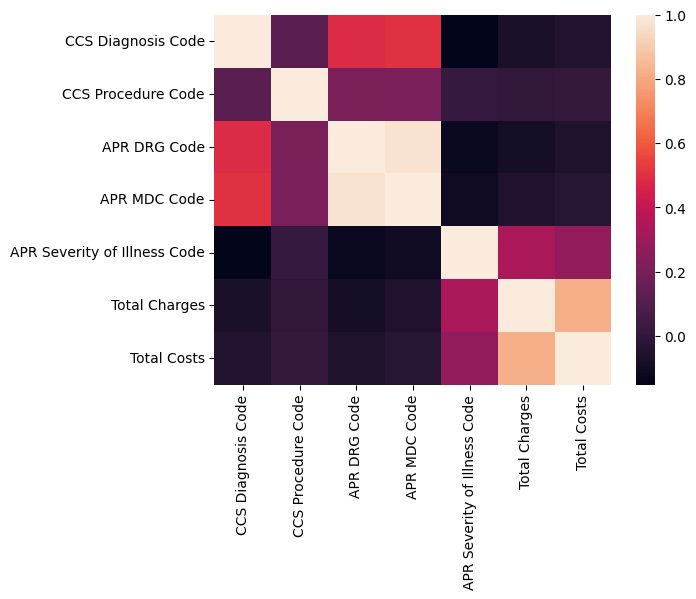

In [26]:
numeric_cols = df2.select_dtypes(include='number')
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix)



In [27]:

categorical_columns = ['Age Group', 'Gender','APR Severity of Illness Description','CCS Diagnosis Description','APR Medical Surgical Description','Type of Admission', 'Patient Disposition', 'Emergency Department Indicator','Length of Stay','APR Risk of Mortality','Hospital County','Source of Payment 1']

# Perform one-hot encoding for selected categorical columns
df2_encoded = pd.get_dummies(df2, columns=categorical_columns)

# Print updated DataFrame with one-hot encoding applied
print(df2_encoded.head())


   CCS Diagnosis Code  CCS Procedure Code  APR DRG Code  APR MDC Code  \
0               135.0                 0.0           249             6   
1               231.0                61.0           912            25   
2                42.0                 0.0           240             6   
3               254.0               215.0           860            23   
4               203.0               153.0           301             8   

   APR Severity of Illness Code  Total Charges  Total Costs  \
0                             1        4476.23      1672.65   
1                             3      148612.34     51414.70   
2                             3       16561.99      4032.49   
3                             2       13593.51      4947.81   
4                             1       31962.58     16988.33   

   Age Group_0 to 17  Age Group_18 to 29  Age Group_30 to 49  ...  \
0                  0                   1                   0  ...   
1                  0                   0    

In [28]:
df2_encoded


,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Total Charges,Total Costs,Age Group_0 to 17,Age Group_18 to 29,Age Group_30 to 49,...,Source of Payment 1_Blue Cross,Source of Payment 1_CHAMPUS,Source of Payment 1_Insurance Company,Source of Payment 1_Medicaid,Source of Payment 1_Medicare,Source of Payment 1_Other Federal Program,Source of Payment 1_Other Non-Federal Program,Source of Payment 1_Self-Pay,Source of Payment 1_Unknown,Source of Payment 1_Workers Compensation
0,135.0,0.0,249,6,1,4476.23,1672.65,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,231.0,61.0,912,25,3,148612.34,51414.70,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,42.0,0.0,240,6,3,16561.99,4032.49,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,254.0,215.0,860,23,2,13593.51,4947.81,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,203.0,153.0,301,8,1,31962.58,16988.33,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622128,181.0,75.0,546,14,3,230373.65,83223.46,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2622129,181.0,128.0,544,14,2,20335.27,7677.97,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2622130,178.0,126.0,544,14,1,27775.54,9819.99,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2622131,181.0,127.0,544,14,1,11738.58,3295.21,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [29]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming 'df2_encoded' is your DataFrame

# Ordinal Encoding for ordinal variable
ordinal_encoder = OrdinalEncoder()
df2_encoded['APR Severity of Illness Code'] = ordinal_encoder.fit_transform(df2_encoded[['APR Severity of Illness Code']])

df2_encoded.head()


,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Total Charges,Total Costs,Age Group_0 to 17,Age Group_18 to 29,Age Group_30 to 49,...,Source of Payment 1_Blue Cross,Source of Payment 1_CHAMPUS,Source of Payment 1_Insurance Company,Source of Payment 1_Medicaid,Source of Payment 1_Medicare,Source of Payment 1_Other Federal Program,Source of Payment 1_Other Non-Federal Program,Source of Payment 1_Self-Pay,Source of Payment 1_Unknown,Source of Payment 1_Workers Compensation
0,135.0,0.0,249,6,1.0,4476.23,1672.65,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,231.0,61.0,912,25,3.0,148612.34,51414.70,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,42.0,0.0,240,6,3.0,16561.99,4032.49,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,254.0,215.0,860,23,2.0,13593.51,4947.81,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,203.0,153.0,301,8,1.0,31962.58,16988.33,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
# Print the column names in your DataFrame
print(df.columns)

# Print the unique values in the 'APR Severity of Illness Description' column
print(df['APR Severity of Illness Code'].unique())


Index(['index', 'Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility ID', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Source of Payment 1', 'Source of Payment 2', 'Source of Payment 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')
[1 3 2 4 0]


In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define features (X) and target variable (y)
X = df2_encoded.drop('APR Severity of Illness Code', axis=1)
y = df2_encoded['APR Severity of Illness Code']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


In [ ]:
'''import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Assuming df is your DataFrame
sample_frac = 0.1  # Adjust the fraction based on your memory constraints
ces = sorted(df2_encoded['CCS Diagnosis Code'].unique())

# Initialize the logistic regression model outside the loop
logistic_regression = LogisticRegression(solver='saga')

# Initialize variables for the entire dataset
X_combined = pd.DataFrame()
y_combined = pd.Series()

for i, a in enumerate(ces):
    if i != a:
        # Filter data for the specific CCS Diagnosis Code
        df_filtered = df2_encoded[df2_encoded['CCS Diagnosis Code'] != a].copy()

        # Check if the target column exists
        target_column = "APR Severity of Illness Code"
        if target_column in df_filtered.columns:
            # Drop unnecessary columns
            df_filtered = df_filtered.drop(target_column, axis=1, errors='ignore')

            # Sample a fraction of the data
            df_sampled = df_filtered.sample(frac=sample_frac, random_state=0)

            # Append to the combined dataset
            X_combined = pd.concat([X_combined, df_sampled])

            # Append to the target variable
            y_combined = pd.concat([y_combined, df2_encoded[df2_encoded['CCS Diagnosis Code'] != a].sample(frac=sample_frac, random_state=0)[target_column]])

# Split the combined dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=0)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model on the entire dataset
logistic_regression.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')'''


<ipython-input-31-beea99a8c15f>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_combined = pd.Series()


In [47]:
param_xgb = {
                'max_depth': [3, 5, 7],
                'learning_rate': [0.1, 0.01, 0.001],
                'subsample': [0.5, 0.7, 1]
            }

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Assuming df2_encoded is your DataFrame

param_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

for i, c in enumerate():
    df = df2_encoded[df2_encoded['Total Charges'] == c].copy()
    df.drop(['Total Charges'], axis=1, inplace=True)

    X = df.drop('APR Severity of Illness Code', axis=1)
    y = df['APR Severity of Illness Code']

    # Convert target variable to integers
    y = y.astype(int)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Scale the features
    sc = MinMaxScaler()
    X_train_scaled = sc.fit_transform(X_train)
    X_test_scaled = sc.transform(X_test)

    # Train XGBoost model
    xgb = RandomizedSearchCV(XGBClassifier(), param_distributions=param_xgb, cv=2)
    xgb.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = xgb.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for Total Charges {c}: {accuracy}\n\n')


TypeError: ignored